In [9]:
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.path.append("..")
import utils as ut
from assets import Account

# Make a stock and view its performance
Create a stock of Fortis Inc and view its performance over 20 years based on the current dividend and perspective growth

In [10]:
# Create a Brokerage Account
a = Account()

FTS = a.Stock(a, name='FTS.TO', shares=50, price=50.78, dividend=1.8, annual_growth=5, volatility='med', drip=True,
              dividend_percent_growth=10)
# View the summary of the stock before compounding
FTS.summary()

The total value of FTS.TO is $2539.00.
You have 50 shares at a price of $50.78.
You have $0.00 in cash.




In [11]:
values, prices, cash = FTS.compound(years=20)
# View the summary of the stock after compounding
FTS.summary()

The total value of FTS.TO is $11477.29.
You have 62.0 shares at a price of $121.21.
You have $3962.03 in cash.




We see that 12 new shares were perchased over the 20 years through the DRIP program, remaining dividends went to a collective cash account called 'a' in the code.
The results can also be plotted.

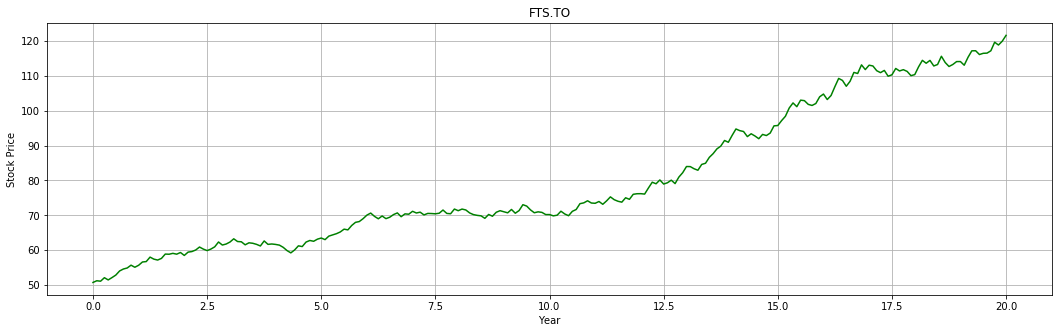

In [13]:
# The stock price can be plotted
ut.plot_growth(prices, 'Stock Price', FTS.name)
plt.show()

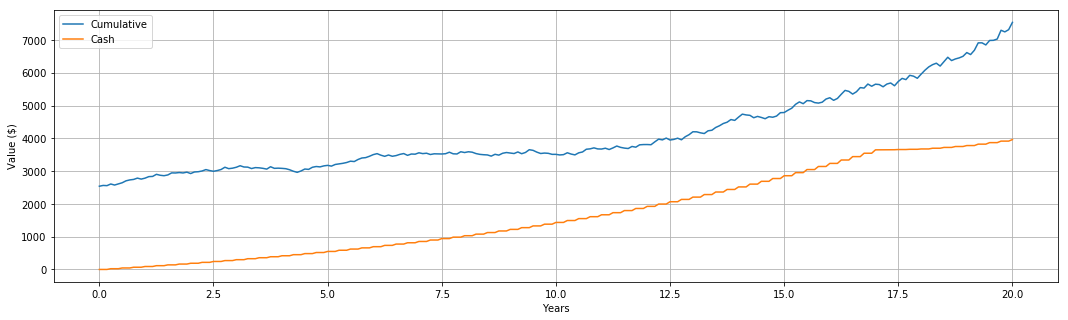

In [14]:
# The value of the cash account as well as the cumulative value (stock + cash) can also be plotted
plt.figure(figsize=(18,5))
x = np.array([i / 12 for i in range(len(values))])
plt.plot(x,values,label='Cumulative');
plt.plot(x,cash,label='Cash');
plt.ylabel('Value ($)');
plt.xlabel('Years');
plt.grid()
plt.legend();

We see that the cash account does not grow as quickly after approximately 17 years.  This is because the dividends are reinvested by buying shares since at this point the quarterly dividend was finally large enough to purchase at least one share.  There also appears to be more cumulative growth after this time due to more compounding from the DRIP.

Next we can simulate various scenarios of the stock growth to get a better idea of potential outcomes. (With high volitility to see some more variation)

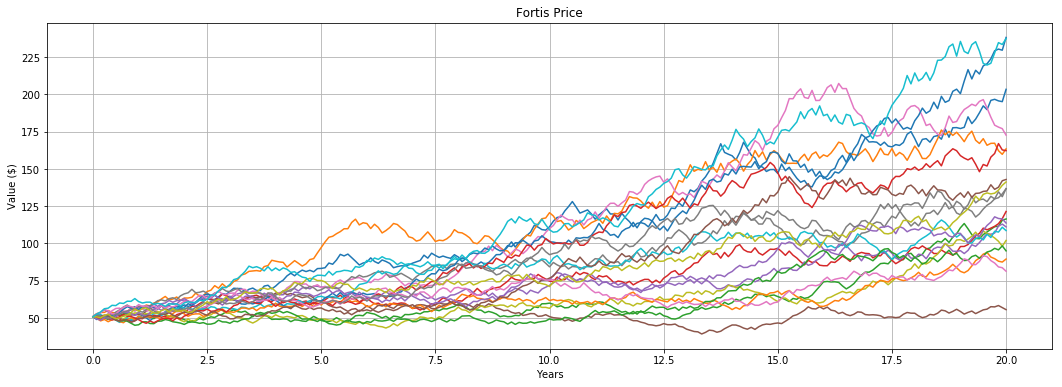

In [15]:
plt.figure(figsize=(18,6))
# make 20 simulations
for _ in range(20):
    a = Account()
    FTS = a.Stock(a, name='FTS.TO', shares=50, price=50.78, dividend=1.8, annual_growth=5, volatility='high', drip=True,
                  dividend_percent_growth=10)
    values, prices, cash = FTS.compound(years=20)
    plt.plot(x,prices);

plt.ylabel('Value ($)');
plt.xlabel('Years');
plt.title('Fortis Price')
plt.grid()

Annual/monthly deposits and withdrawals can be made where new stocks are purchased or sold with a commission price.  Let's see how a $1000 annual deposit helps grow an account.

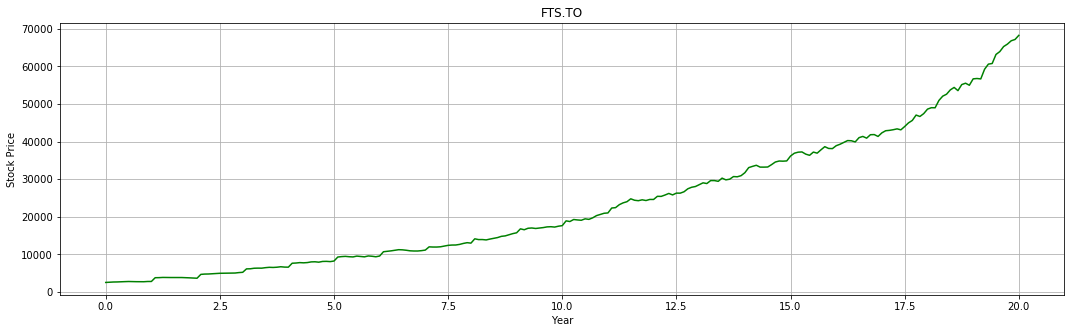

In [16]:
a = Account()

FTS = a.Stock(a, name='FTS.TO', shares=50, price=50.78, dividend=1.8, annual_growth=5, volatility='med', drip=True,
              dividend_percent_growth=10)
values, prices, cash = FTS.compound(years=20, annual_deposit=1000)
ut.plot_growth(values, 'Stock Price', FTS.name)
plt.show()

If the user makes excessive withdrawals resulting in the account going broke, an error arrises telling the user how long it took for the account to go broke. Here the user will go broke in 4 years with a $1000/year withdrawal.

In [22]:
a = Account()

FTS = a.Stock(a, name='FTS.TO', shares=50, price=50.78, dividend=1.8, annual_growth=5, volatility='med', drip=True,
              dividend_percent_growth=10)
values, prices, cash = FTS.compound(years=20, annual_withdrawal=1000)
ut.plot_growth(values, 'Stock Price', FTS.name)
plt.show()

Exception: You will go broke in 4.00 years with FTS.TO. 
 Please reevaluate your strategy.